# Machine Learning Lab 1

## Assignment 3 (Deadline : 29/10/2020 11:59PM)

Total Points : 100

In [5]:
import numpy as np
np.random.seed(42)  # setting random seed for reproducibility

### 1. Digit Classification : 8 vs others (40 points)

In [6]:
# Import the required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import precision_score,recall_score
from sklearn.model_selection import cross_val_predict,train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, log_loss
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [3]:
# The digits data can be loaded as follows :
from sklearn import datasets
D = datasets.load_digits()
X, y = D["data"], D["target"]

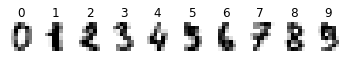

In [4]:
# Plot a few digits to get a sense of how the data looks like
for i in range(10):
    a = X[i]
    aa = a.reshape(8,8)
    plt.subplot(1, 10, i+1)
    plt.imshow(aa, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis('off')
    plt.title(y[i])

plt.show()

In [5]:
# Create a 2-class classification problem (digit 8 versus other digits)
# 20% for testing and rest for training
data_i = np.copy(X)
data_o = np.copy(y)
for i in range(len(data_o)):
    if(data_o[i] == 8):
        data_o[i] = 1
    else:
        data_o[i] = 0

# shuffled_indices = np.random.permutation(len(D))
# split = int(len(data_i) * 0.8)
# train_data_i = data_i[:split]
# train_data_o = data_o[:split]
# test_data_i = data_i[split:]
# test_data_o = data_o[split:]
train_data_i, test_data_i, train_data_o, test_data_o = train_test_split(data_i, data_o, test_size=0.20, random_state=42, stratify=data_o)



In [6]:
# Train a logistic regression model with no regularisation for the problem and obtain the cross validation accuracies

clf = LogisticRegression(penalty="none", random_state=42, max_iter=8000, solver="saga")
clf.fit(train_data_i, train_data_o)
scores = cross_val_score(clf, data_i, data_o, cv=5, scoring="accuracy")
print(scores)


[0.925      0.94444444 0.94428969 0.94428969 0.92200557]


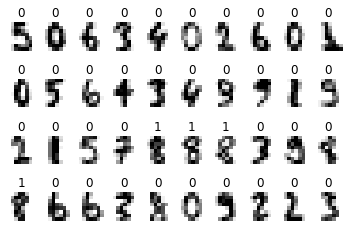

In [7]:
# Predict values for the test set using the model obtained above 
pred = clf.predict(test_data_i)

# Plot a few digits to get a sense of how the data looks like
for i in range(40):
    a = test_data_i[i]
    aa = a.reshape(8,8)
    plt.subplot(4, 10, i+1)
    plt.imshow(aa, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis('off')
    plt.title(pred[i])

plt.show()

In [8]:
# Obtain all the different performance metrics for the model on the test set
calculated_output_prob = clf.predict_proba(test_data_i)
loss = log_loss(test_data_o, calculated_output_prob, normalize=False)
print(loss)
pred = cross_val_predict(clf, data_i, data_o, cv=5)
print(confusion_matrix(data_o, pred))

40.1565932739518
[[1565   58]
 [  57  117]]


In [9]:
# Change the hyperparameters of the model and see what effect it has on the model
# Find the hyperparameters which maximises the model performance. Choose the right performance metric to evaluate the model
# L2 regularisation 
alphas = np.linspace(0.0001, 0.1, 20)
l2_model = LogisticRegressionCV(Cs=alphas, random_state=42,max_iter=8000, solver='saga', penalty='l2')
l2_model.fit(train_data_i,train_data_o)

LogisticRegressionCV(Cs=array([0.0001    , 0.00535789, 0.01061579, 0.01587368, 0.02113158,
       0.02638947, 0.03164737, 0.03690526, 0.04216316, 0.04742105,
       0.05267895, 0.05793684, 0.06319474, 0.06845263, 0.07371053,
       0.07896842, 0.08422632, 0.08948421, 0.09474211, 0.1       ]),
                     class_weight=None, cv=None, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=8000,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=42, refit=True, scoring=None, solver='saga',
                     tol=0.0001, verbose=0)

In [27]:
l2_opt_alpha = l2_model.C_
l2_best_train_score = np.max(l2_model.scores_[1][0])
l2_test_score = f1_score(l2_model.predict(test_data_i),test_data_o)
l2_opt_alpha,l2_best_train_score,l2_test_score

(array([0.00535789]), 0.9652777777777778, 0.7719298245614035)

In [13]:
# L1 regularisation 
alphas = np.linspace(0.01, 2, 50)
l1_model = LogisticRegressionCV(Cs=alphas, random_state=42,max_iter=8000, solver='saga', penalty='l1')
l1_model.fit(train_data_i,train_data_o)

LogisticRegressionCV(Cs=array([0.01      , 0.03020408, 0.05040816, 0.07061224, 0.09081633,
       0.11102041, 0.13122449, 0.15142857, 0.17163265, 0.19183673,
       0.21204082, 0.2322449 , 0.25244898, 0.27265306, 0.29285714,
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.5959183...
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ]),
                     class_weight=None, cv=None, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=8000,
                     multi_class='auto', n_jobs=None, penalty='l1',
                     random_state=42, refit=True, scoring=None, solver='saga',
                     tol=0.0001, verbose=0)

In [26]:
l1_opt_alpha = l1_model.C_
l1_best_train_score = np.max(l1_model.scores_[1][0])
l1_test_score = f1_score(l1_model.predict(test_data_i),test_data_o)
l1_opt_alpha, l1_best_train_score, l1_test_score

(array([0.71714286]), 0.9722222222222222, 0.8125)

In [28]:
# L1 regularisation 
alphas = np.linspace(0.001, 2, 10)
l1_ratios =  np.array([1, 0.9, 0.5, 0.3, 0.1])
elastic_model = LogisticRegressionCV(Cs=alphas, random_state=42,max_iter=8000, solver='saga', penalty='elasticnet', l1_ratios=l1_ratios)
elastic_model.fit(train_data_i,train_data_o)


LogisticRegressionCV(Cs=array([1.00000000e-03, 2.23111111e-01, 4.45222222e-01, 6.67333333e-01,
       8.89444444e-01, 1.11155556e+00, 1.33366667e+00, 1.55577778e+00,
       1.77788889e+00, 2.00000000e+00]),
                     class_weight=None, cv=None, dual=False, fit_intercept=True,
                     intercept_scaling=1.0,
                     l1_ratios=array([1. , 0.9, 0.5, 0.3, 0.1]), max_iter=8000,
                     multi_class='auto', n_jobs=None, penalty='elasticnet',
                     random_state=42, refit=True, scoring=None, solver='saga',
                     tol=0.0001, verbose=0)

In [25]:
elastic_opt_alpha = l1_model.C_
elastic_best_train_score = np.max(elastic_model.scores_[1][0])
elastic_test_score = f1_score(elastic_model.predict(test_data_i),test_data_o)
elastic_opt_alpha, elastic_best_train_score, elastic_test_score, elastic_model.l1_ratio_

(array([0.71714286]), 0.9618055555555556, 0.7741935483870968, array([0.3]))

### 2. California Housing Prices (60 points)

In this problem, we will take the same California Housing prices dataset that was shown in the last lab class to do a binary classification of whether the median house value for a given locality is high or low .

In [7]:
# Get the data from the website to the local directory

import os
import tarfile
from six.moves import urllib

source_path = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"
local_path = os.path.join("datasets", "housing")

os.makedirs(local_path, exist_ok=True)
tgz_path = os.path.join(local_path, "housing.tgz")

urllib.request.urlretrieve(source_path, tgz_path)
housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=local_path)
housing_tgz.close()

In [8]:
# Read the data into a dataframe
df = pd.read_csv('./datasets/housing/housing.csv')

/Users/deepankarsingh/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/deepankarsingh/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/deepankarsingh/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/U

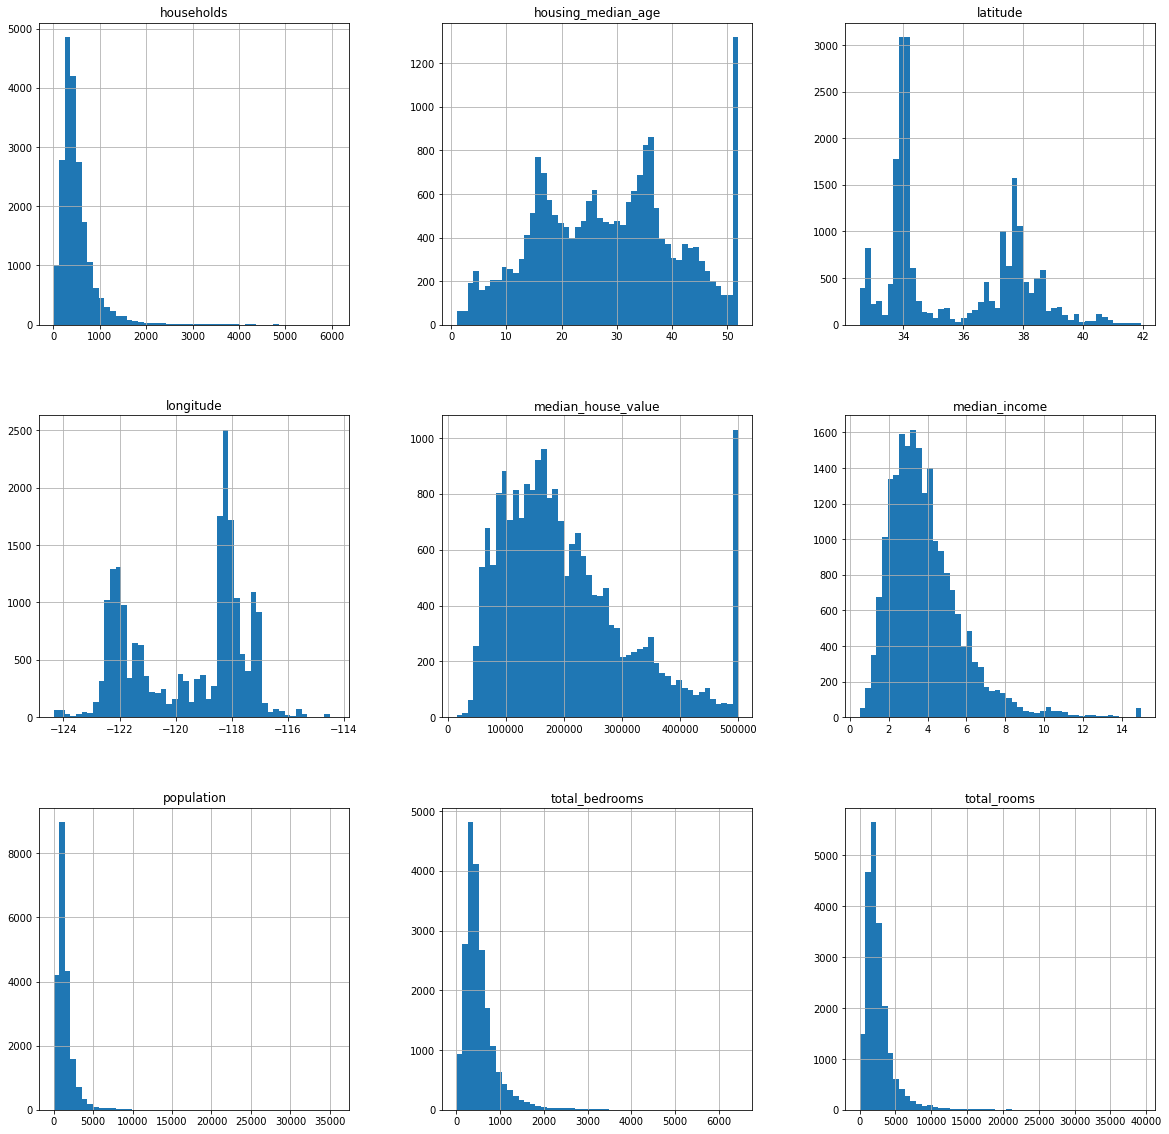

In [9]:
# Explore the data to understand it better
df.hist(bins=50,figsize=(20,20))
plt.show()


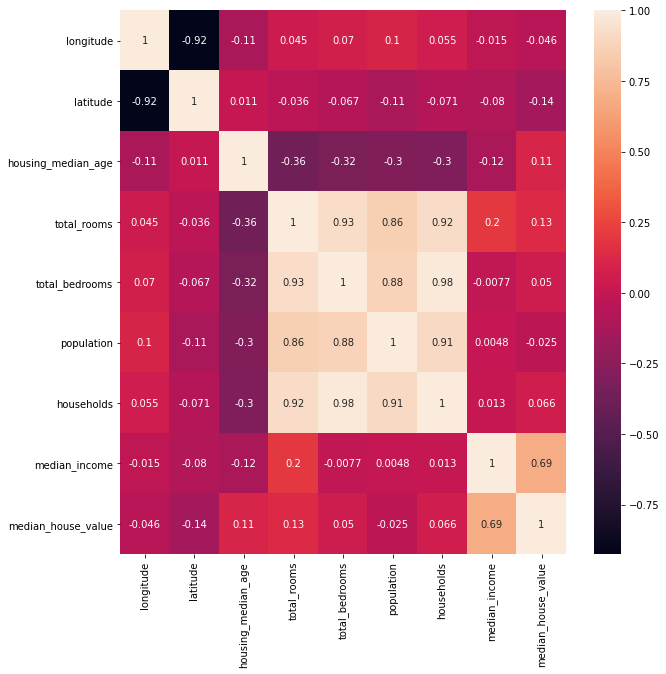

In [10]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

In [11]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [12]:
# Convert the data to suit a binary classification of High Price vs Low Price for the median_house_value column
# Assume that anything >= $200,000 is high price with output value 1 and anything less than that is low price with output value 0.
df['Price_Binary'] = np.where(df['median_house_value']>=200000,1,0)
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Price_Binary
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0


In [13]:
# Drop median_house_value column
df.drop(['median_house_value'],axis=1,inplace=True)
# Replace Nan
df['total_bedrooms'].replace(to_replace=np.nan, value = np.mean(df['total_bedrooms']),inplace=True)
ocean_proximity = pd.get_dummies(df.ocean_proximity)
df2 = pd.concat([df,ocean_proximity], axis = 'columns')
df2.drop(['ocean_proximity'], axis='columns', inplace = True)
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Price_Binary,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,1,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,1,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,1,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,1,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,0,1,0,0,0


In [14]:
# # Seggregate Output and Features
y = np.array(df2['Price_Binary'])

In [15]:
df2.drop(['Price_Binary'], axis=1,inplace=True)

In [16]:
X = np.array(df2)

In [24]:
# Use stratified sampling to create an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
X_test.shape

(4128, 13)

In [18]:
lr = LogisticRegression(penalty="none", random_state=42, max_iter=10000, solver="saga")
lr.fit(X_train, y_train)
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring="accuracy")
print(scores)

[0.72721768 0.73811686 0.7286493  0.71441551 0.71592974]


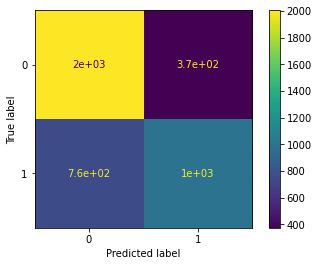

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test)

In [151]:
# Find the best Logistic Regression model that can solve this problem
alphas = np.linspace(0.0001, 0.1, 20)
l2_model = LogisticRegressionCV(Cs=alphas, random_state=42, max_iter=10000, solver='saga', penalty='l2')
l2_model.fit(X_train,y_train)

LogisticRegressionCV(Cs=array([0.0001    , 0.00535789, 0.01061579, 0.01587368, 0.02113158,
       0.02638947, 0.03164737, 0.03690526, 0.04216316, 0.04742105,
       0.05267895, 0.05793684, 0.06319474, 0.06845263, 0.07371053,
       0.07896842, 0.08422632, 0.08948421, 0.09474211, 0.1       ]),
                     class_weight=None, cv=None, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=10000,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=42, refit=True, scoring=None, solver='saga',
                     tol=0.0001, verbose=0)

In [152]:
l2_opt_alpha = l2_model.C_
l2_best_train_score = np.max(l2_model.scores_[1][0])
l2_test_score = f1_score(l2_model.predict(X_test),y_test)
l2_opt_alpha,l2_best_train_score,l2_test_score

(array([0.01587368]), 0.727217680896155, 0.63758819756254)

In [154]:
# L1 regularisation 
alphas = np.linspace(0.01, 2, 50)
l1_model = LogisticRegressionCV(Cs=alphas, random_state=42,max_iter=10000, solver='saga', penalty='l1')
l1_model.fit(X_train,y_train)


LogisticRegressionCV(Cs=array([0.01      , 0.05061224, 0.09122449, 0.13183673, 0.17244898,
       0.21306122, 0.25367347, 0.29428571, 0.33489796, 0.3755102 ,
       0.41612245, 0.45673469, 0.49734694, 0.53795918, 0.57857143,
       0.61918367, 0.65979592, 0.70040816, 0.74102041, 0.78163265,
       0.8222449 , 0.86285714, 0.90346939, 0.94408163, 0.98469388,
       1.02530612, 1.06591837, 1.10653061, 1.14714286, 1.187755...
       1.43142857, 1.47204082, 1.51265306, 1.55326531, 1.59387755,
       1.6344898 , 1.67510204, 1.71571429, 1.75632653, 1.79693878,
       1.83755102, 1.87816327, 1.91877551, 1.95938776, 2.        ]),
                     class_weight=None, cv=None, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=10000,
                     multi_class='auto', n_jobs=None, penalty='l1',
                     random_state=42, refit=True, scoring=None, solver='saga',
                     tol=0.0001, verbose=0)

In [155]:
l1_opt_alpha = l1_model.C_
l1_best_train_score = np.max(l1_model.scores_[1][0])
l1_test_score = f1_score(l1_model.predict(X_test),y_test)
l1_opt_alpha, l1_best_train_score, l1_test_score

(array([0.41612245]), 0.727217680896155, 0.63758819756254)

In [ ]:
# Elasticsnet regularisation 
alphas = np.linspace(0.001, 2, 10)
l1_ratios =  np.array([1, 0.9, 0.5, 0.3, 0.1])
elastic_model = LogisticRegressionCV(Cs=alphas, random_state=42,max_iter=10000, solver='saga', penalty='elasticnet', l1_ratios=l1_ratios)
elastic_model.fit(X_train, y_train)

In [ ]:
elastic_opt_alpha = l1_model.C_
elastic_best_train_score = np.max(elastic_model.scores_[1][0])
elastic_test_score = f1_score(elastic_model.predict(test_data_i),test_data_o)
elastic_opt_alpha, elastic_best_train_score, elastic_test_score, elastic_model.l1_ratio_